# Image Analaysis: Real data (aka s--t just got real)

Today you will analyze sample data on calcium measurements in Physaurm polycephalum. Physarum is a very simple, network-like organism that utilizes peristaltic contractions of its cortical actomyosin layer. The contractions of the actomyosin layer are presumably driven by calcium. 

In your SampleData folder, you will find a sequence of 10 fluorescence microscopy images, 5 belonging to the calcium channel (green) and 5 in the reference dye channel. The tasks are the following:

# Exercise A: Signal isolation

# A1. Load all the images in the memory.

_Hint: Create a dictionary for each channel and load the images as arrays._

Do not manually enter c1_01,c2_01,c1_02...!

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calc = {}
ref = {}

path = 'SampleData/'
no_img = 5 # per channel

for i in range(1,no_img+1):
    calc_img=plt.imread(path + 'c1_' + str(i).zfill(2) + '.tif')
    calc[i] = calc_img
    ref_img=plt.imread(path + 'c2_' + str(i).zfill(2) + '.tif')
    ref[i] = ref_img

__From now on you don't have to work with the whole dictionary, just choose one image from each channel (each dictionary).__

# A2. Convert a pair of frames (c1_01 and c2_01) to grayscale.

(2048, 2048, 3)
(2048, 2048, 3)
(2048, 2048)
(2048, 2048)


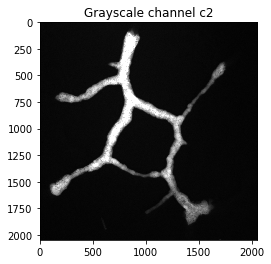

In [65]:
# choose just one pair of images
calc_img = calc[1]
ref_img = ref[2]

print(np.shape(calc_img))
print(np.shape(ref_img))

calc_gray = calc_img[:,:,0] #taking the value of the red channel
ref_gray = ref_img[:,:,0] # the same here

print(np.shape(calc_gray))
print(np.shape(ref_gray))

plt.imshow(ref_gray, cmap='gray')
plt.title('Grayscale channel c2')
plt.show()

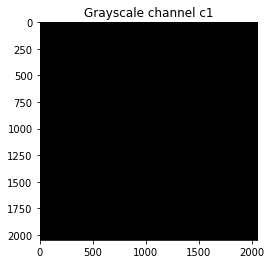

In [66]:
plt.close('all')
plt.title('Grayscale channel c1')
plt.imshow(calc_gray, cmap='gray')
plt.show()

This did not work because there is no red signal in this channel. We can either use just the green one ([:,:,1]) or use our pretty function we covered in the lecture:

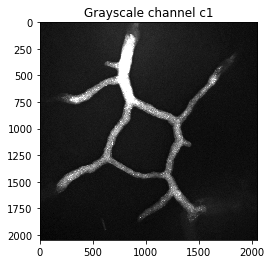

In [67]:
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]): #the weights are normally used conversion factors
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1)) # tile creates an array by repeating elements
    return np.sum(tile * im, axis=2)

calc_gray=to_grayscale(calc_img)
plt.imshow(calc_gray, cmap='gray')
plt.title('Grayscale channel c1')
plt.show()

# A3. Downsample the data to make the image smaller.
This is done to take up less memory and process the images faster.

_Hint: Take every 2nd pixel of the grayscale image to create the new image._

In [68]:
print ('old size', str(np.shape(calc_gray)))
calc_gray = calc_gray[::2,::2]
print('new size', str(np.shape(calc_gray)))
print('Voila!')
ref_gray = ref_gray[::2,::2] # the same for the red (c2) channel

old size (2048, 2048)
new size (1024, 1024)
Voila!


# A4. Find the contours of the organism using the reference dye (c2) channel.

_Hint: Convert the newly downsamples grayscale image to a binary image using diffrent theresholds. Find a threshold that works best for showing a clear outline of the organism. Save that binary image as a separate image to use later._

Bonus: plot different thresholds as subplots.

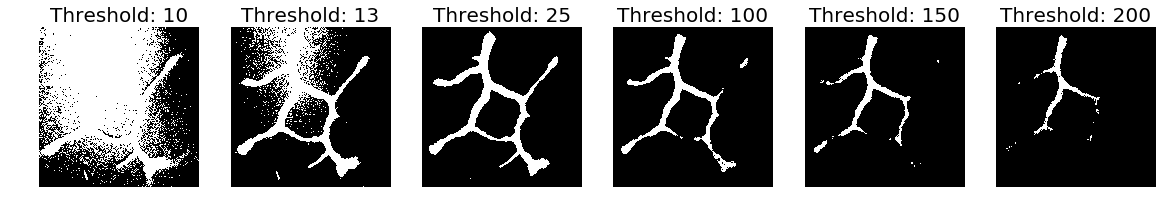

In [69]:
def simple_threshold(im_gray, threshold):
    return (im_gray > threshold).astype("uint8")

thresholds = [10,13,25,100,150,200]

fig, ax = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
                        
for t, ax in zip(thresholds, ax):
    ax.imshow(simple_threshold(ref_gray, t), cmap='gray');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();

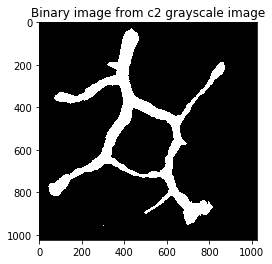

In [70]:
best_threshold = 25 # choose visually

ref_binary = simple_threshold(ref_gray, best_threshold)
plt.title('Binary image from c2 grayscale image')
plt.imshow(ref_binary, cmap='gray')

# A5. Isolate the signal from background in the calcium (c1) channel.
Using the reference dye channel, mask background pixels in the c1 channel.

_Hints:_
1. Use np.where to find indices of elements whose pixel value is 0 (background) on the binary image obtained from c2 channel.
2. On the grayscale image from channel c1, mask all background pixels using the criterion found above.
3. On the masked grayscale image from channel c1, fill all masked elements with value 0.
4. Display the obtained c1 channel with background set to 0.

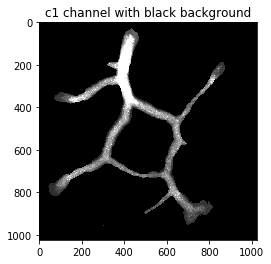

In [72]:
im_masked = np.ma.masked_where(ref_binary == 0, calc_gray) # mask all indices on grayscale c2 
#where pixel value on ref_binary == 0
im_filled = np.ma.filled(im_masked, 0) # fill those pixels with 0 (black)
plt.title('c1 channel with black background')
plt.imshow(im_filled, cmap='gray')

You don't believe we made a difference? Let's count black and white pixels.

In [86]:
tot_no_pix= np.shape(im_filled[0])[0] * np.shape(im_filled[1])[0]
print ('total number of pixels:', str(tot_no_pix))
no_white_px_old= np.count_nonzero(ref_gray)
no_white_px_new= np.count_nonzero(im_filled)
print ('Numer of white pixels in old image', str(no_white_px_old), ' and black', str(tot_no_pix-no_white_px_old))
print ('Numer of white pixels in new image', str(no_white_px_new), ' and black', str(tot_no_pix-no_white_px_new))

total number of pixels: 1048576
Numer of white pixels in old image 1048576  and black 0
Numer of white pixels in new image 118125  and black 930451


# Exercise B: Creating a mixed-channel image

# B1. Overlay a pair of RGB images.

Use a pair of RGB images from each channel, create an alpha channel and overlay the images to see both channels in the same image.

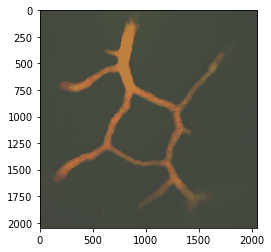

In [92]:
im_c1= calc[1]
im_c2= ref[1]

red_c1 = im_c1[:,:,0]
blue_c1 = im_c1[:,:,1]
green_c1= im_c1[:,:,2]

red_c2 = im_c2[:,:,0]
blue_c2 = im_c2[:,:, 1]
green_c2= im_c2[:,:,2]

# now we create a transparent alpha channel and fill it with value 128 = half-transparent
alpha= np.ones((np.shape(im_c1)[0], np.shape(im_c1)[1])).astype('uint8')*128

merge_c1 = np.dstack((red_c1, blue_c1, green_c1, alpha)) # join the arrays depth-wise (2D arrays into 3D array)
merge_c2 = np.dstack((red_c2, blue_c2, green_c2, alpha)) # join the arrays depth-wise (2D arrays into 3D array)
# now plot it
plt.imshow(merge_c1)
plt.imshow(merge_c2)
plt.show()

# Exercise C: Tracking the organism growth

# C1. Plot the ratio of white vs. black pixels in the binary images of one channel.

Focus on just one channel (I suggest c2 because the signal is better defined). Convert all the images in the dictionary of this channel first to grayscale, and then to binary using the threshold value you already found in A4. Use the same threshold for each image in your dictionary.

Now looping through the arrays (images) in the dictionary, count the number of black and white pixels.
Calculate their ratio and plot its evolution over time.

0.09092857458689992
0.09432850696559794
0.09202408944054875
0.08739998537794133
0.08716999109901964


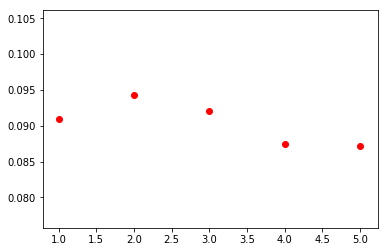

In [98]:
plt.close('all')
for i in ref.keys():
    ref_gray=to_grayscale(ref[i])
    ref_binary = simple_threshold(ref_gray, best_threshold)
    tot_no_px= np.shape(ref_binary[0])[0] * np.shape(ref_binary[1])[0]
    no_white_px= np.count_nonzero(ref_binary)
    no_black_px= tot_no_px - no_white_px
    px_ratio= no_white_px/no_black_px
    plt.scatter(i, px_ratio, c='r')
    print (px_ratio)
plt.title('Ratio of white vs. black pixels')
plt.show()